1) Import libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

2) Load dataset:

In [12]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\regression_datasets_large.xlsx - Taxi_Fare.csv",encoding='latin1')
print("First 5 rows:\n",df.head())  #print first 5 rows
print(df.info())  #Shows the summary of the dataset
print("Summary:\n",df.describe())  #Gives summary statistics for numerical columns

First 5 rows:
    Trip_ID  Distance_km     Fare_Rs  Duration_min Traffic_Level  \
0        1     9.735319  116.472746     44.746874          High   
1        2    10.326559  400.736005     98.813482           Low   
2        3    20.979714  295.256653     58.673731          High   
3        4    31.169312  190.422112     13.823125          High   
4        5     2.717575  169.682559     24.096040           Low   

   Driver_Rating Payment_Type Day_of_Week Time_of_Day Weather  
0       4.563782       Wallet         Fri   Afternoon   Rainy  
1       4.531717         Cash         Fri       Night   Clear  
2       4.383311       Wallet         Tue   Afternoon   Clear  
3       4.931278       Wallet         Sun       Night   Rainy  
4       3.787111         Card         Fri     Evening   Rainy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   

3) Data cleaning:

In [15]:
df.isnull().sum()  #find the missing values

Trip_ID          0
Distance_km      0
Fare_Rs          0
Duration_min     0
Traffic_Level    0
Driver_Rating    0
Payment_Type     0
Day_of_Week      0
Time_of_Day      0
Weather          0
dtype: int64

In [16]:
df.duplicated().sum() #find the duplicate values

np.int64(0)

In [17]:
df.dropna()


,Trip_ID,Distance_km,Fare_Rs,Duration_min,Traffic_Level,Driver_Rating,Payment_Type,Day_of_Week,Time_of_Day,Weather
0,1,9.735319,116.472746,44.746874,High,4.563782,Wallet,Fri,Afternoon,Rainy
1,2,10.326559,400.736005,98.813482,Low,4.531717,Cash,Fri,Night,Clear
2,3,20.979714,295.256653,58.673731,High,4.383311,Wallet,Tue,Afternoon,Clear
3,4,31.169312,190.422112,13.823125,High,4.931278,Wallet,Sun,Night,Rainy
4,5,2.717575,169.682559,24.096040,Low,3.787111,Card,Fri,Evening,Rainy
...,...,...,...,...,...,...,...,...,...,...
195,196,18.411235,359.017167,90.063533,Low,3.615638,Cash,Wed,Night,Cloudy
196,197,25.132111,485.330244,75.411713,High,3.482330,Card,Sun,Afternoon,Clear
197,198,26.949243,653.010389,6.917719,Low,3.467135,Card,Sat,Morning,Cloudy
198,199,20.527726,322.587786,27.398952,Medium,3.136373,Card,Sun,Morning,Cloudy


4) Exploratory data analysis(EDA):

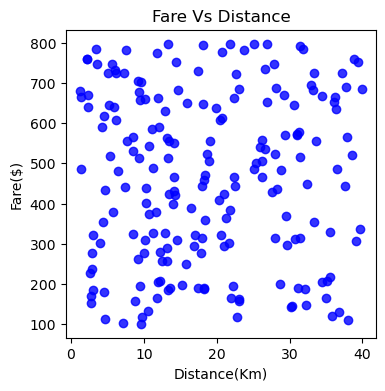

In [56]:
#scatter plot for Distance and Fare
plt.figure(figsize=(4,4))
plt.scatter(df["Distance_km"],df["Fare_Rs"],alpha=0.6,color='blue')
plt.xlabel("Distance(Km)")
plt.ylabel("Fare($)")
plt.title("Fare Vs Distance")
plt.show()

In [25]:
print(df.corr(numeric_only=True))

                Trip_ID  Distance_km   Fare_Rs  Duration_min  Driver_Rating
Trip_ID        1.000000    -0.016605  0.162788      0.117345      -0.136388
Distance_km   -0.016605     1.000000  0.017577      0.010439      -0.076587
Fare_Rs        0.162788     0.017577  1.000000      0.093858       0.061819
Duration_min   0.117345     0.010439  0.093858      1.000000      -0.053792
Driver_Rating -0.136388    -0.076587  0.061819     -0.053792       1.000000


5) Build Linear Regression Model:

In [28]:
x=df[["Distance_km"]]
y=df["Fare_Rs"]
model=LinearRegression()
model.fit(x,y)
slope=model.coef_[0]
intercept=model.intercept_
print(f"Model:Fare={intercept:.2f}+{slope:.2f}xDistance")

Model:Fare=457.58+0.33xDistance


6)Model evaluation:

In [40]:
y_pred=model.predict(x)
MSE=mean_squared_error(y,y_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(y,y_pred)
print("Slope:",slope)
print("Intercept:",intercept)
print(f"RMSE:{RMSE:.2f}")
print(f"R2 score:{r2:f}")

Slope: 0.3320751027266172
Intercept: 457.58335442769203
RMSE:207.15
R2 score:0.000309


7)Prediction for 15 Km Trip:

In [33]:
fare_15=model.predict(pd.DataFrame({"Distance_km":[15]}))
print(f"Prediction for 15 Km Trip:{fare_15[0]:.2f}")

Prediction for 15 Km Trip:462.56


8) Visualize Regression Line:

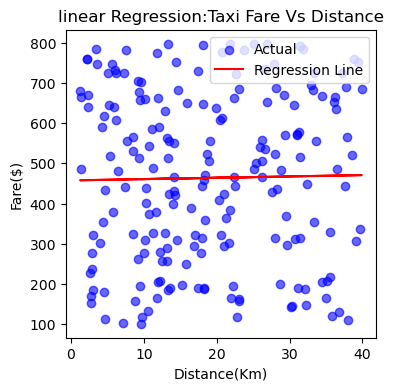

In [51]:
plt.figure(figsize=(4,4))
plt.scatter(df["Distance_km"],df["Fare_Rs"],alpha=0.6,color="blue",label="Actual")
plt.plot(df["Distance_km"],y_pred,color="red",label="Regression Line")
plt.xlabel("Distance(Km)")
plt.ylabel("Fare($)")
plt.title("linear Regression:Taxi Fare Vs Distance")
plt.legend()
plt.show()